In [72]:
#imports
import numpy as np
import matplotlib.pyplot as plt

#magic command
%matplotlib inline

#### Importing the data

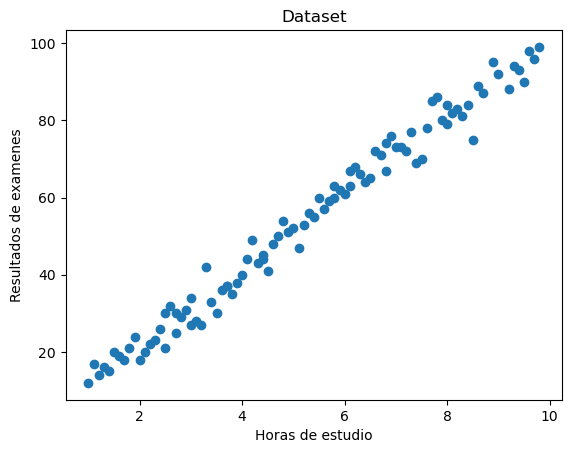

In [73]:
#Load data
points = np.genfromtxt('score.csv', delimiter=',', skip_header=1)

#Extract columns
x = np.array(points[:,0])
y = np.array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Horas de estudio')
plt.ylabel('Resultados de examenes')
plt.title('Dataset')
plt.show()

#### Defining the hyperparameters


In [92]:
#Hyperparameters
learning_rate = 0.001
initial_b = 0
initial_m = 0
num_iterations = 100

#### Defining the cost function


In [93]:
# Cost function
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    # Extracting the x and y values from the points array
    x = points[:, 0]  # Extracting the x values (feature)
    y = points[:, 1]  # Extracting the y values (target)
    
    # Compute sum of squared errors
    total_cost = np.sum((y - (m * x + b)) ** 2)
  
    # Return average of squared error
    return total_cost / N

#### Defining Gradient Descent functions


In [94]:
def run_gradient_descent(points, initial_b, initial_m, learning_rate, num_iterations):
    # Initialize the intercept and slope parameters
    b = initial_b
    m = initial_m
    # List to store the history of costs in each iteration
    cost_history = []

    # Loop iterating over the specified number of iterations. For each iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        # Calculate the current cost and append it to the history
        cost_history.append(compute_cost(b, m, points))
        
        # Update the parameters using the calculate_gradients function
        b, m = calculate_gradients(b, m, np.array(points), learning_rate)

        # Printing values
        print(f'Iteration {i+1}: b = {b}, m = {m}, Cost = {cost_history[-1]}')

    # Return the final values of b and m, along with the cost history
    return [b, m, cost_history]

def calculate_gradients(b_current, m_current, points, learning_rate):
    # Initialize gradients to zero
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    # Calculate Gradients
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    # Update current m and b using gradients and learning rate
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    # Return updated parameters
    return b_updated, m_updated

#### Running run_gradient_descent() to get optimized parameters b and m


In [95]:
# Running run_gradient_descent() to get optimized parameters b and m
b, m, cost_graph = run_gradient_descent(points, initial_b, initial_m, learning_rate, num_iterations)

# Print optimized parameters
print('Optimized b:', b)
print('Optimized m:', m)

# Print error with optimized parameters
minimized_cost = compute_cost(b, m, points)
print('Minimized cost:', minimized_cost)

Iteración 1: b = 0.10804166666666665, m = 0.6919062500000001, Costo = 3537.6041666666665
Iteración 2: b = 0.20857772936197913, m = 1.3356956755620657, Costo = 3064.2485309020753
Iteración 3: b = 0.3021301300880107, m = 1.9347143534143074, Costo = 2654.438728448104
Iteración 4: b = 0.389184514650301, m = 2.4920756718608184, Costo = 2299.644021033708
Iteración 5: b = 0.47019275671975, m = 3.010676512091025, Costo = 1992.4788830897294
Iteración 6: b = 0.5455753063695515, m = 3.4932123042299064, Costo = 1726.5492621672922
Iteración 7: b = 0.6157233752932902, m = 3.942191036380372, Costo = 1496.3194781937818
Iteración 8: b = 0.6810009700615046, m = 4.3599462894674135, Costo = 1296.996990896601
Iteración 9: b = 0.7417467839842218, m = 4.748649365630441, Costo = 1124.4326366746755
Iteración 10: b = 0.798275957412101, m = 5.110320573199066, Costo = 975.0342582149204
Iteración 11: b = 0.8508817156250524, m = 5.446839726904083, Costo = 845.691928938732
Iteración 12: b = 0.8998368928209817, m = 5

#### Plotting cost per iterations

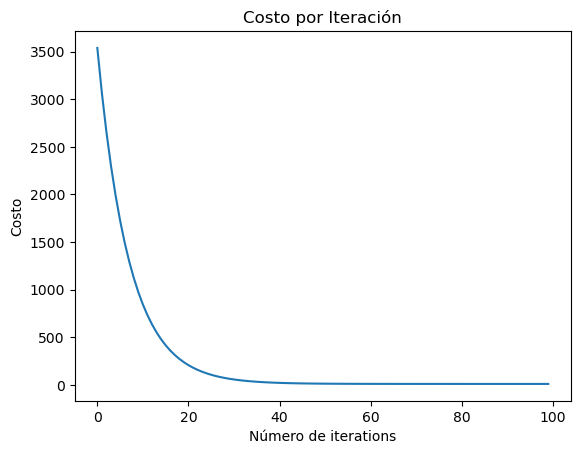

In [101]:
#Plot Cost per Iteration
plt.plot(cost_graph)
plt.xlabel('Número de iterations')
plt.ylabel('Costo')
plt.title('Costo por Iteración')
plt.show()

#### Plotting regression line

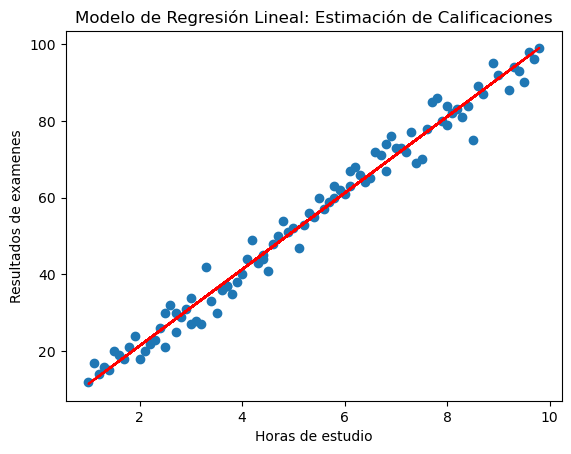

In [104]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.title('Modelo de Regresión Lineal: Estimación de Calificaciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Resultados de examenes')
plt.plot(x, pred, c='r')
plt.show()